<a href="https://colab.research.google.com/github/akreason12/Analysis-of-stock-prices/blob/main/Copy_of_CNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import r2_score

In [ ]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [ ]:
data = pd.read_csv('AXISBANK.csv')
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [ ]:
df = data[['Date','Open','High','Low','Close','Volume']]
df

,Date,Open,High,Low,Close,Volume
0,2000-01-03,26.7,26.70,26.70,26.70,112100
1,2000-01-04,27.0,28.70,26.50,26.85,234500
2,2000-01-05,26.0,27.75,25.50,26.30,170100
3,2000-01-06,25.8,27.00,25.80,25.95,102100
4,2000-01-07,25.0,26.00,24.25,24.80,62600
...,...,...,...,...,...,...
5301,2021-04-26,694.0,703.80,684.50,700.45,21646184
5302,2021-04-27,691.1,703.90,684.10,699.55,46559967
5303,2021-04-28,708.0,712.50,688.15,708.15,54060587
5304,2021-04-29,712.0,726.90,707.00,719.40,25939327


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2000-01-03,26.7,26.70,26.70,26.70,112100
1,2000-01-04,27.0,28.70,26.50,26.85,234500
2,2000-01-05,26.0,27.75,25.50,26.30,170100
3,2000-01-06,25.8,27.00,25.80,25.95,102100
4,2000-01-07,25.0,26.00,24.25,24.80,62600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5306 non-null   object 
 1   Open    5306 non-null   float64
 2   High    5306 non-null   float64
 3   Low     5306 non-null   float64
 4   Close   5306 non-null   float64
 5   Volume  5306 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 248.8+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03
mean,586.507388,596.476187,575.571598,585.893931,4.527938e+06
std,436.602194,443.044833,430.108921,436.649765,8.101940e+06
min,21.000000,23.700000,21.000000,22.150000,2.850000e+03
25%,232.000000,235.125000,227.075000,230.975000,2.842172e+05
50%,520.100000,528.400000,512.025000,519.500000,1.656966e+06
75%,880.075000,897.987500,852.762500,877.312500,5.515245e+06
max,2034.400000,2043.050000,2002.600000,2023.350000,1.205419e+08


In [ ]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
df.reset_index(drop=True, inplace=True)
df.fillna(data.mean(), inplace=True)
df.head()

<ipython-input-11-cf4068d8b1f8>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(data.mean(), inplace=True)
<ipython-input-11-cf4068d8b1f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(data.mean(), inplace=True)


,Date,Open,High,Low,Close,Volume
0,2000-01-03,26.7,26.70,26.70,26.70,112100
1,2000-01-04,27.0,28.70,26.50,26.85,234500
2,2000-01-05,26.0,27.75,25.50,26.30,170100
3,2000-01-06,25.8,27.00,25.80,25.95,102100
4,2000-01-07,25.0,26.00,24.25,24.80,62600


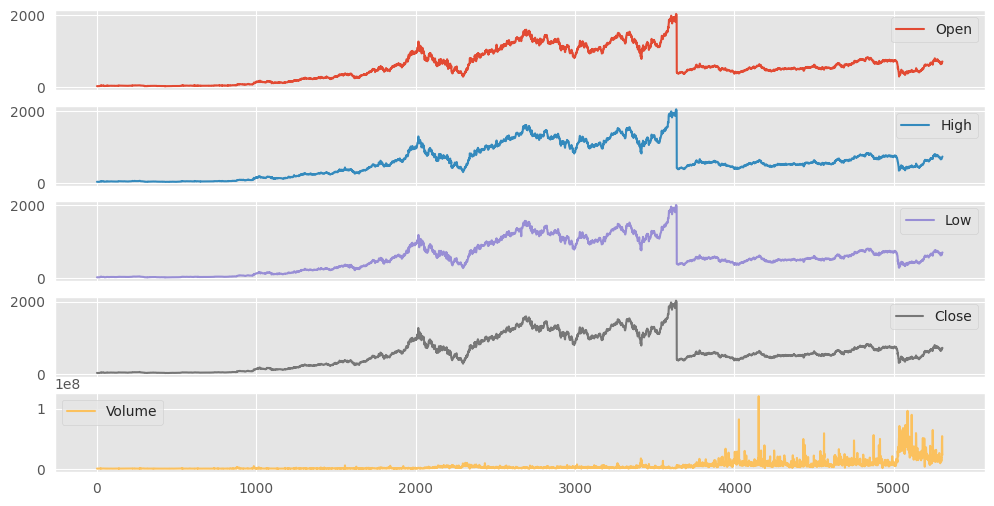

<ipython-input-12-791670a45d91>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]=pd.DataFrame.rolling(df['Close'],ma).mean()
<ipython-input-12-791670a45d91>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]=pd.DataFrame.rolling(df['Close'],ma).mean()
<ipython-input-12-791670a45d91>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

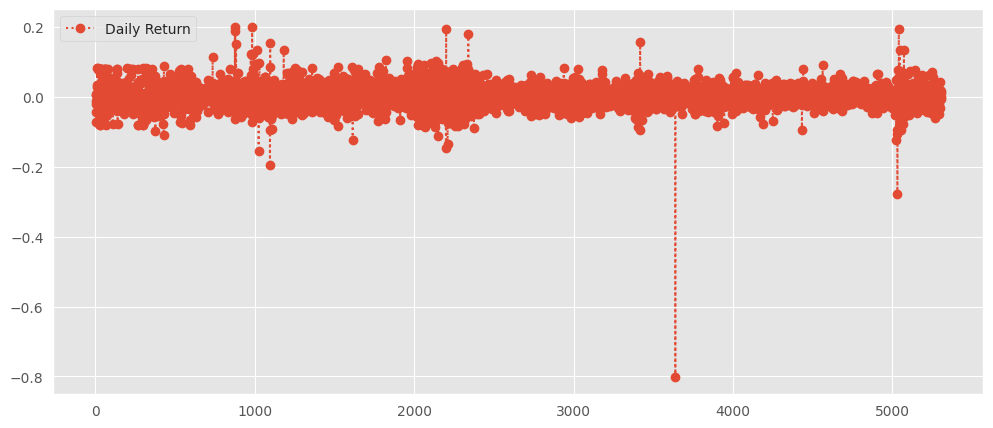

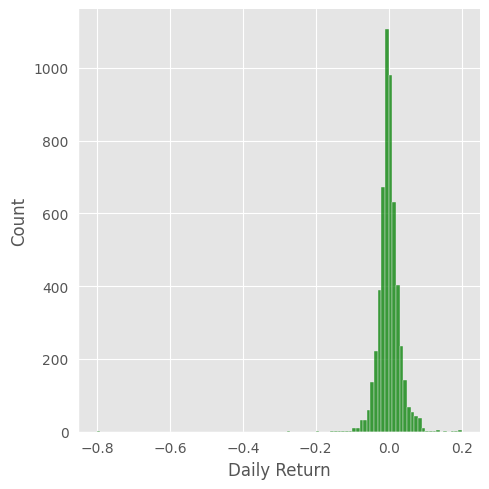

<ipython-input-12-791670a45d91>:31: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(data.mean(), inplace=True)
<ipython-input-12-791670a45d91>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(data.mean(), inplace=True)


            Date   Open    High     Low   Close    Volume  MA for 10 days  \
0     2000-01-03   26.7   26.70   26.70   26.70    112100             NaN   
1     2000-01-04   27.0   28.70   26.50   26.85    234500             NaN   
2     2000-01-05   26.0   27.75   25.50   26.30    170100             NaN   
3     2000-01-06   25.8   27.00   25.80   25.95    102100             NaN   
4     2000-01-07   25.0   26.00   24.25   24.80     62600             NaN   
...          ...    ...     ...     ...     ...       ...             ...   
5301  2021-04-26  694.0  703.80  684.50  700.45  21646184         663.325   
5302  2021-04-27  691.1  703.90  684.10  699.55  46559967         666.460   
5303  2021-04-28  708.0  712.50  688.15  708.15  54060587         673.715   
5304  2021-04-29  712.0  726.90  707.00  719.40  25939327         679.555   
5305  2021-04-30  705.0  729.85  705.00  714.90  23011654         684.160   

      MA for 50 days  MA for 100 days  Daily Return  
0                NaN 

Date                0
Open                0
High                0
Low                 0
Close               0
Volume              0
MA for 10 days      9
MA for 50 days     49
MA for 100 days    99
Daily Return        1
dtype: int64

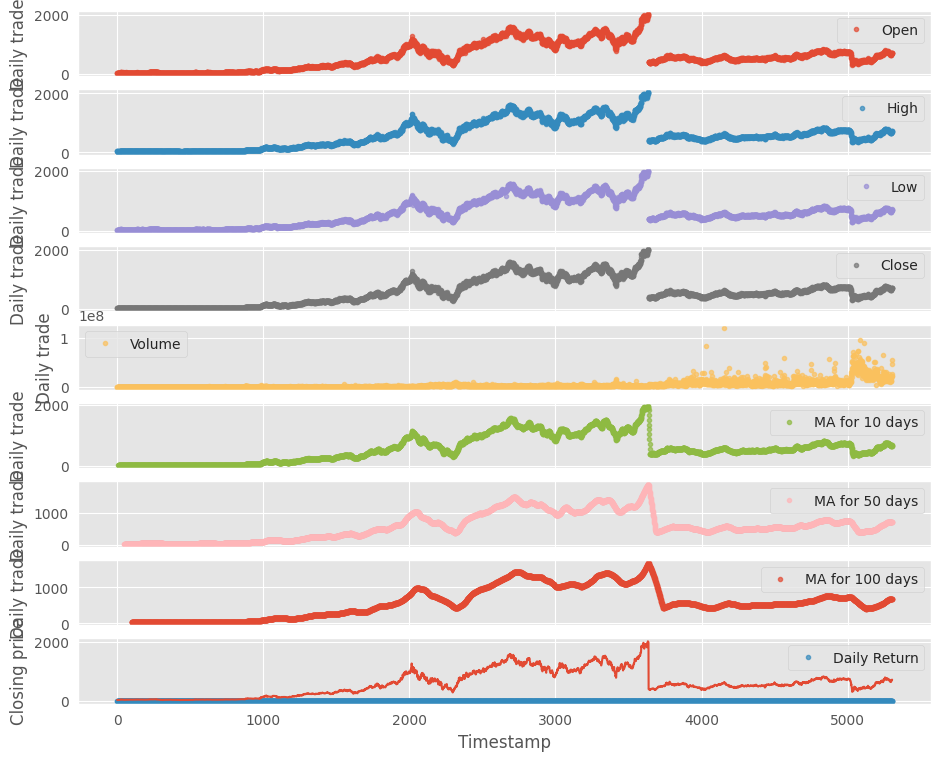

In [ ]:
df.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()

df.shape
df.size
df.describe(include='all').T
df.dtypes
df.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df[column_name]=pd.DataFrame.rolling(df['Close'],ma).mean()

df['Daily Return'] = df['Close'].pct_change()

#daily return percentage
df['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(df['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(df['Date'])
closing_df1 = pd.DataFrame(df['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

df.reset_index(drop=True, inplace=True)
df.fillna(data.mean(), inplace=True)
df.head()

df.nunique()

df.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = df[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(df['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df1 = df
print(df1)

df.isnull().sum()

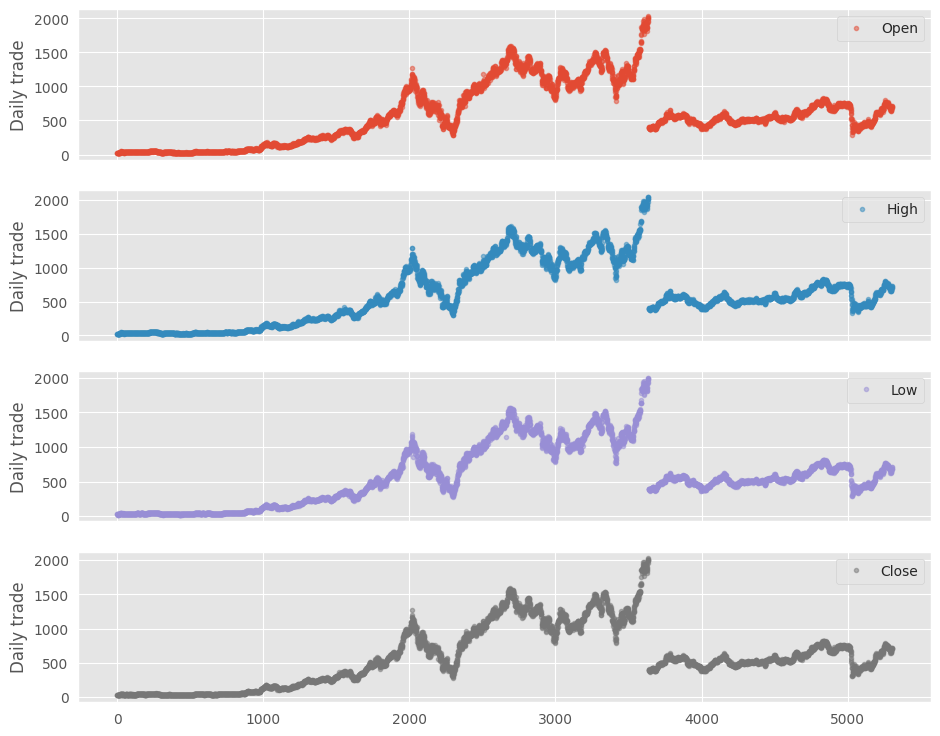

In [ ]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

            Date   Open    High     Low   Close    Volume  MA for 10 days  \
0     2000-01-03   26.7   26.70   26.70   26.70    112100             NaN   
1     2000-01-04   27.0   28.70   26.50   26.85    234500             NaN   
2     2000-01-05   26.0   27.75   25.50   26.30    170100             NaN   
3     2000-01-06   25.8   27.00   25.80   25.95    102100             NaN   
4     2000-01-07   25.0   26.00   24.25   24.80     62600             NaN   
...          ...    ...     ...     ...     ...       ...             ...   
5301  2021-04-26  694.0  703.80  684.50  700.45  21646184         663.325   
5302  2021-04-27  691.1  703.90  684.10  699.55  46559967         666.460   
5303  2021-04-28  708.0  712.50  688.15  708.15  54060587         673.715   
5304  2021-04-29  712.0  726.90  707.00  719.40  25939327         679.555   
5305  2021-04-30  705.0  729.85  705.00  714.90  23011654         684.160   

      MA for 50 days  MA for 100 days  Daily Return  
0                NaN 

,count,mean,std,min,25%,50%,75%,max
Open,5306.0,5.865074e+02,4.366022e+02,21.000000,232.000000,5.201000e+02,8.800750e+02,2.034400e+03
High,5306.0,5.964762e+02,4.430448e+02,23.700000,235.125000,5.284000e+02,8.979875e+02,2.043050e+03
Low,5306.0,5.755716e+02,4.301089e+02,21.000000,227.075000,5.120250e+02,8.527625e+02,2.002600e+03
Close,5306.0,5.858939e+02,4.366498e+02,22.150000,230.975000,5.195000e+02,8.773125e+02,2.023350e+03
Volume,5306.0,4.527938e+06,8.101940e+06,2850.000000,284217.250000,1.656966e+06,5.515245e+06,1.205419e+08
MA for 10 days,5297.0,5.862736e+02,4.351901e+02,24.195000,232.520000,5.194150e+02,8.856650e+02,1.968145e+03
MA for 50 days,5257.0,5.879644e+02,4.296793e+02,25.612000,234.429000,5.234700e+02,9.015860e+02,1.902544e+03
MA for 100 days,5207.0,5.900551e+02,4.231652e+02,26.589500,238.643750,5.304225e+02,9.277560e+02,1.685351e+03
Daily Return,5305.0,1.177503e-03,3.054145e-02,-0.800906,-0.012981,0.000000e+00,1.430104e-02,2.004175e-01


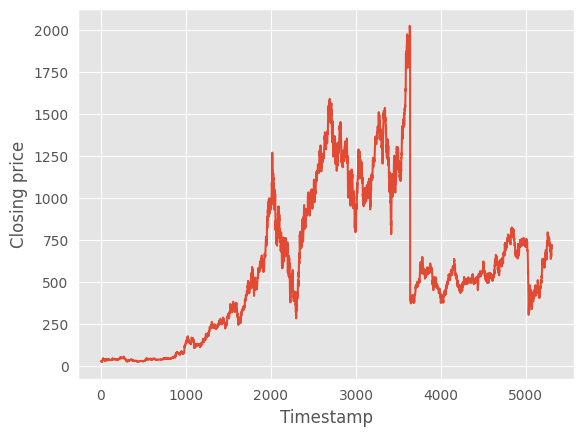

In [ ]:
plt.plot(df['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df1 = df
print(df1)

df1.describe().transpose()

In [ ]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df1) - window_size -1 , 1):
    first = df1.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df1.iloc[i + j, 2] - first) / first)
    temp2.append((df1.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

4163
1041


In [ ]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
105/105 [==============================] - 19s 76ms/step - loss: 0.0346 - mse: 0.0346 - mae: 0.1225 - val_loss: 0.0124 - val_mse: 0.0124 - val_mae: 0.0742
Epoch 2/40
105/105 [==============================] - 5s 44ms/step - loss: 0.0156 - mse: 0.0156 - mae: 0.0846 - val_loss: 0.0121 - val_mse: 0.0121 - val_mae: 0.0738
Epoch 3/40
105/105 [==============================] - 6s 56ms/step - loss: 0.0144 - mse: 0.0144 - mae: 0.0814 - val_loss: 0.0097 - val_mse: 0.0097 - val_mae: 0.0669
Epoch 4/40
105/105 [==============================] - 5s 45ms/step - loss: 0.0134 - mse: 0.0134 - mae: 0.0778 - val_loss: 0.0090 - val_mse: 0.0090 - val_mae: 0.0643
Epoch 5/40
105/105 [==============================] - 6s 60ms/step - loss: 0.0133 - mse: 0.0133 - mae: 0.0779 - val_loss: 0.0089 - val_mse: 0.0089 - val_mae: 0.0631
Epoch 6/40
105/105 [==============================] - 5s 44ms/step - loss: 0.0119 - mse: 0.0119 - mae: 0.0734 - val_loss: 0.0096 - val_mse: 0.0096 - val_mae: 0.0694
Epoch 7/4

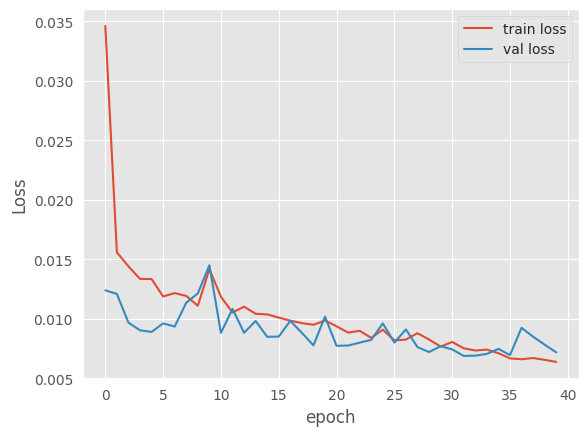

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

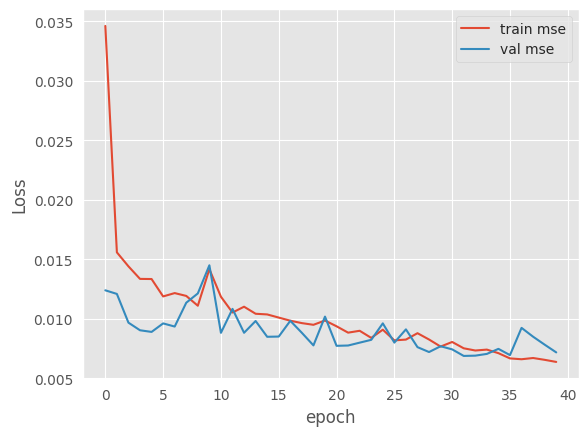

In [ ]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

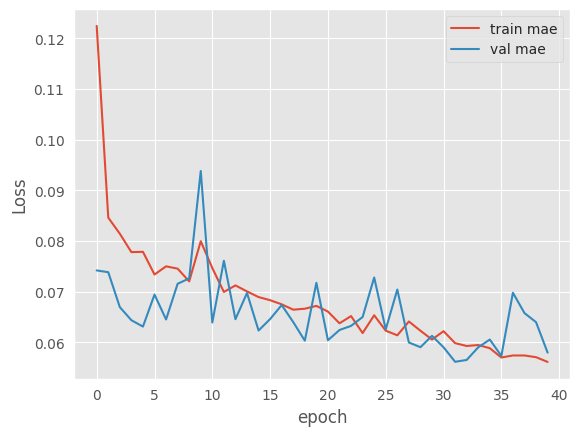

In [ ]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

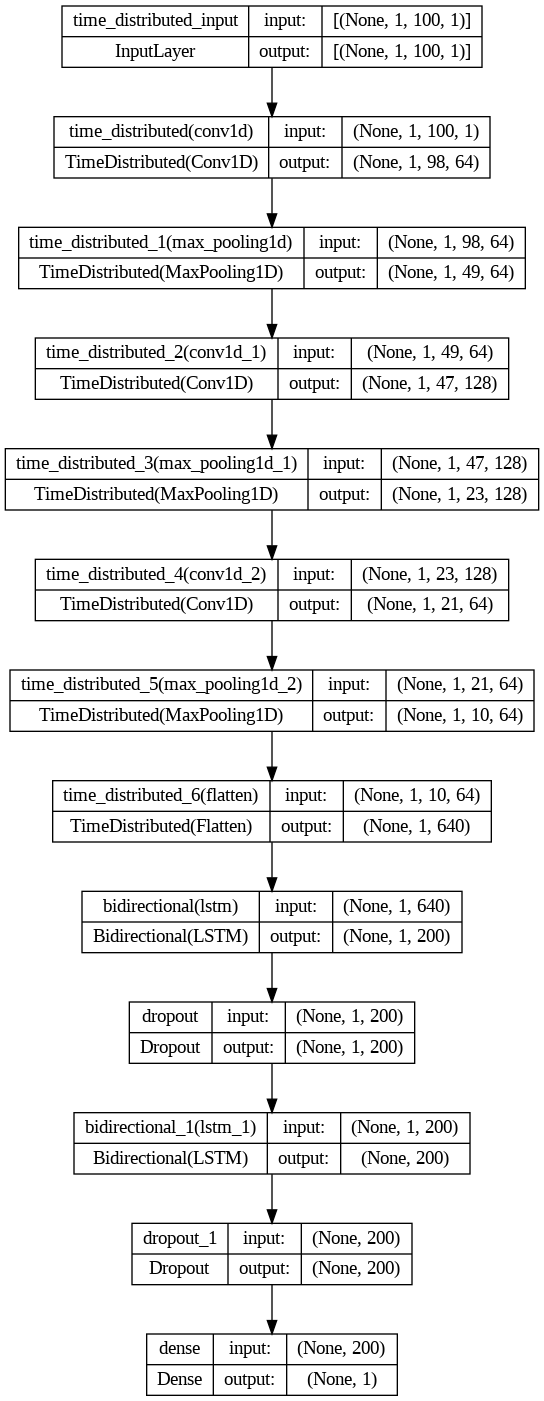

In [ ]:
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.evaluate(test_X, test_Y)

33/33 [==============================] - 0s 10ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0579


[0.007182153407484293, 0.007182153407484293, 0.057945962995290756]

In [ ]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.934779
R2 Score: 0.934779
Max Error: 1.008310


33/33 [==============================] - 0s 10ms/step


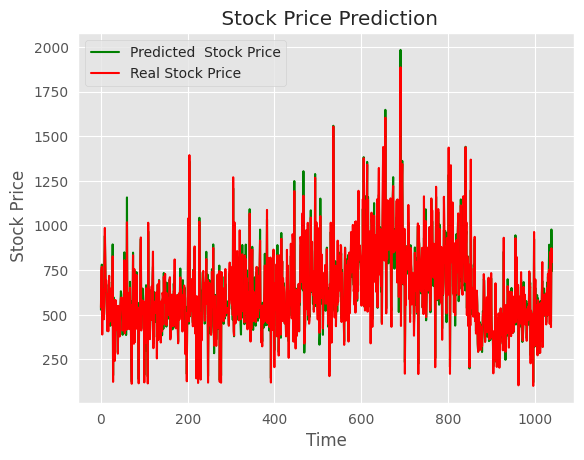

In [ ]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(test_label, predicted), 2))
print("Mean squared error =", round(sm.mean_squared_error(test_label, predicted), 2))
print("Median absolute error =", round(sm.median_absolute_error(test_label, predicted), 2))
print("Explain variance score =", round(sm.explained_variance_score(test_label, predicted), 2))
print("R2 score =", round(sm.r2_score(test_label, predicted), 2))

Mean absolute error = 33.26
Mean squared error = 2423.26
Median absolute error = 23.66
Explain variance score = 0.96
R2 score = 0.96


In [ ]:
model.save("model.h5")

In [ ]:
new_model = tf.keras.models.load_model("./model.h5")

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

In [ ]:
data2 = pd.read_csv('ADANIPORTS.csv')
data2.dropna(inplace=True)
data2.head()

data2.reset_index(drop=True, inplace=True)
data2.fillna(data.mean(), inplace=True)
data2.head()
df2 = data2.drop('Date', axis=1)

print(df2)

X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

<ipython-input-46-0754a5a667c9>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.fillna(data.mean(), inplace=True)


          Symbol Series  Prev Close    Open    High     Low    Last   Close  \
0     MUNDRAPORT     EQ      161.45  162.10  165.70  161.25  163.50  164.00   
1     MUNDRAPORT     EQ      164.00  164.00  165.15  160.15  161.15  161.25   
2     MUNDRAPORT     EQ      161.25  161.50  162.80  159.20  161.00  161.05   
3     MUNDRAPORT     EQ      161.05  160.50  161.10  159.05  160.00  159.85   
4     MUNDRAPORT     EQ      159.85  159.85  162.75  156.35  157.00  157.25   
...          ...    ...         ...     ...     ...     ...     ...     ...   
2451  ADANIPORTS     EQ      725.35  733.00  739.65  728.90  729.20  730.75   
2452  ADANIPORTS     EQ      730.75  735.00  757.50  727.35  748.60  749.15   
2453  ADANIPORTS     EQ      749.15  755.00  760.00  741.10  743.40  746.25   
2454  ADANIPORTS     EQ      746.25  753.20  765.85  743.40  746.40  746.75   
2455  ADANIPORTS     EQ      746.75  739.00  759.45  724.50  726.40  730.05   

        VWAP    Volume      Turnover    Trades  Del

In [ ]:
model.evaluate(test_X, test_Y)

15/15 [==============================] - 0s 16ms/step - loss: 0.0099 - mse: 0.0099 - mae: 0.0691


[0.009868958964943886, 0.009868958964943886, 0.06906412541866302]

15/15 [==============================] - 0s 19ms/step


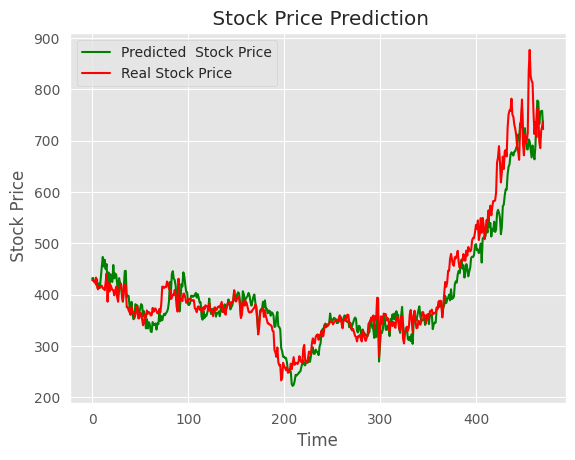

In [ ]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [ ]:
print("Mean absolute error =", round(sm.mean_absolute_error(test_label, predicted), 2))
print("Mean squared error =", round(sm.mean_squared_error(test_label, predicted), 2))
print("Median absolute error =", round(sm.median_absolute_error(test_label, predicted), 2))
print("Explain variance score =", round(sm.explained_variance_score(test_label, predicted), 2))
print("R2 score =", round(sm.r2_score(test_label, predicted), 2))

Mean absolute error = 24.45
Mean squared error = 1234.39
Median absolute error = 17.7
Explain variance score = 0.92
R2 score = 0.92
